In [6]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# 설치먼저. 코랩에서 설치.
# https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb#scrollTo=soJ-SCCt40Fn

font_name = fm.FontProperties(fname=fontpath, size=10).get_name()
# plt.rc('font', family='NanumBarunGothic') 
plt.rc('font', family=font_name)
 
# mpl.font_manager.findfont(font)
# fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

from google.colab import drive
import os

plt.style.use('default')

In [7]:
############################################################################################
# -- Colab 경로.
# 데이터 호출하기
entry_data = pd.read_csv('./drive/My Drive/Colab Notebooks/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('./drive/My Drive/Colab Notebooks/aiffel/data/sales_data.csv')
item_data = pd.read_csv('./drive/My Drive/Colab Notebooks/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('./drive/My Drive/Colab Notebooks/aiffel/data/item_entry_data.csv')

######################################################################
# -- 아이펠 노트북 경로
# 데이터 호출하기
# entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
# sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
# item_data = pd.read_csv('/aiffel/data/item_data.csv')
# item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')
#######################################################################
cwd = os.getcwd()
print(cwd)


/content


In [8]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [9]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [10]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [11]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [12]:
# # 문제 1: 월별 매출액 추세
# # 활용할 데이터(sales_data)를 temp_var로 정의하기
# # [[YOUR CODE]]
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = temp_var['결제일시'].str[:7]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [13]:
# # sales_data의 결제금액에 포함된 쉼표(,) 지우기
# # [[YOUR CODE]]
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',','')

# # # sales_data의 결제금액을 숫자형태로 바꾸기
# # # [[YOUR CODE]]
sales_data['결제금액'] = sales_data['결제금액'].astype(np.int64)

# # # # temp_var의 payment열을 date 기준으로 집계하기
# # # # [[YOUR CODE]]
payment_data = temp_var['결제금액'].groupby(temp_var['date']).sum()



In [14]:
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

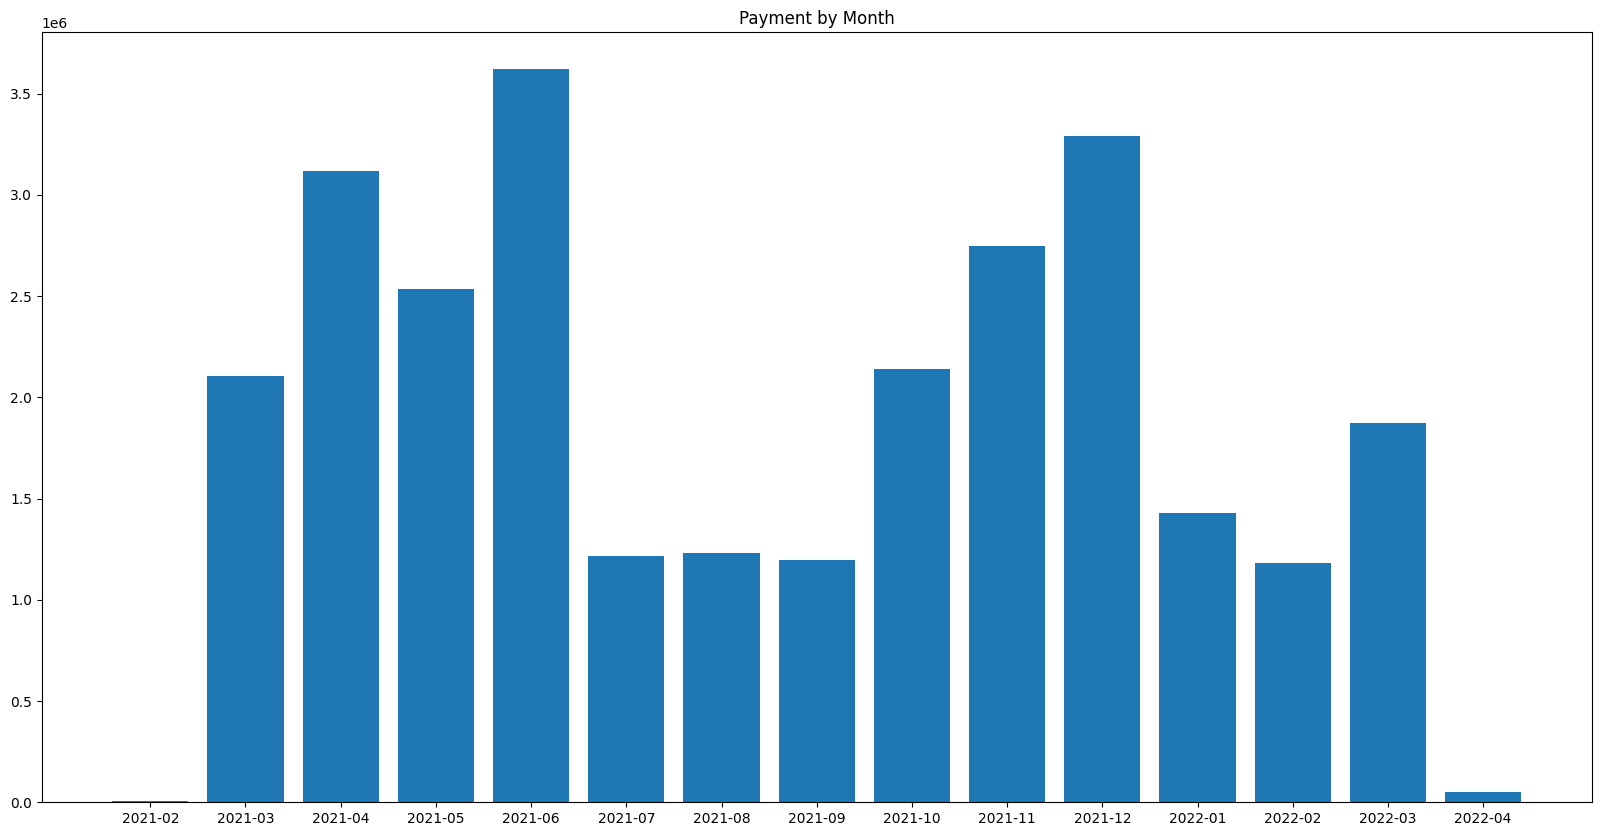

In [15]:
# 집계 결과를 시각화하기
# [[YOUR CODE]]
payment_data
plt.figure(figsize = (20, 10))
plt.bar(payment_data.index, payment_data)
# plt.title('월별 매출')
plt.title('Payment by Month')
plt.show()

In [16]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
# [[YOUR CODE]]
temp_var01 = temp_var[temp_var['판매수량'] !=-1]
temp_var01.reset_index(drop=True)
items_count = temp_var01['상품명'].value_counts()


# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
# [[YOUR CODE]]
items_count = pd.DataFrame(items_count)
# items_count['상품명'] = pd.to_numeric(items_count['상품명'])
items_count.sort_values(by=['상품명'], ascending=False)
items_count.reset_index(inplace=True)
items_count.rename(columns = {'상품명':'집계수량', 'index':'상품명'}, inplace = True)
items_count = items_count.head(10)


In [17]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')  #터미널 창에서 커맨드로  설치해야한다.
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

<function matplotlib.pyplot.show(close=None, block=None)>

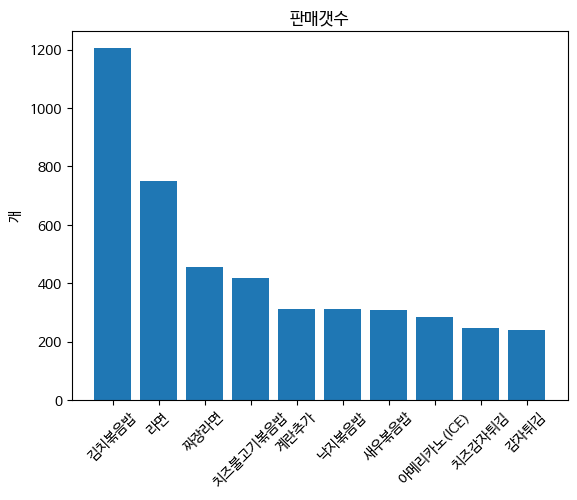

In [18]:
# 집계 결과를 시각화하기
# [[YOUR CODE]]

plt.bar(items_count['상품명'], items_count['집계수량'])
plt.title('판매갯수')
plt.ylabel('개')
plt.xticks(rotation = 45)
# plt.legend(["상품명"], fontsize=10)
plt.show



# # 체크해보면 폰트 개수가 늘어났다
# sys_font=fm.findSystemFonts()
# print(f"sys_font number: {len(sys_font)}")

# nanum_font = [f for f in sys_font if 'Nanum' in f]
# print(f"nanum_font number: {len(nanum_font)}")
# # 한번 프린트 해보자
# nanum_font

In [19]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
# [[YOUR CODE]]
items_payment = temp_var01['결제금액'].groupby(temp_var01['상품명']).sum()

# 집계 결과 상위 10개 선정하기
items_payment = pd.DataFrame(items_payment)
# items_payment['결제금액'] = pd.to_numeric(items_payment['결제금액'])
items_payment = items_payment.sort_values(by=['결제금액'], ascending=False)
items_payment.reset_index(inplace=True)
items_payment = items_payment.head(10)
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]

<function matplotlib.pyplot.show(close=None, block=None)>

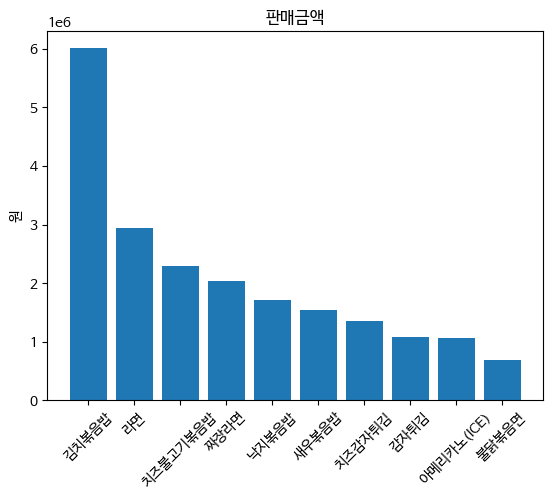

In [20]:
# 집계 결과 시각화하기
# [[YOUR CODE]]
plt.bar(items_payment['상품명'], items_payment['결제금액'])
plt.title('판매금액')
plt.ylabel('원')
plt.xticks(rotation = 45)
plt.show

In [21]:
# 10-3 LMS 에 있는 문제.

# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
# [[YOUR CODE]]
temp_var03 = entry_data

# temp_var의 금액을 숫자형태로 변환하기
# [[YOUR CODE]]
temp_var03['금액'] = pd.to_numeric(temp_var03['금액']) 
temp_var03

# temp_var의 금액을 요금제명을 기준으로 집계하기
# [[YOUR CODE]]
tickets = temp_var03['금액'].groupby(temp_var03['요금제명']).sum()


# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]
tickets = pd.DataFrame(tickets)

tickets.reset_index(inplace=True)
tickets['금액'] = pd.to_numeric(tickets['금액'])
ax = tickets.sort_values(by=['금액'], ascending=False).head(10)
ax.reset_index(drop = True, inplace=True)
ax

,요금제명,금액
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


<function matplotlib.pyplot.show(close=None, block=None)>

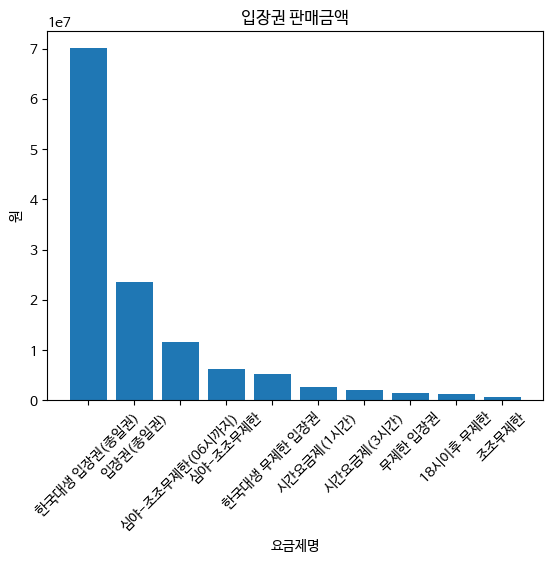

In [22]:
# 집계 결과 시각화하기
# [[YOUR CODE]]




plt.bar(ax['요금제명'], ax['금액'])
plt.title('입장권 판매금액')
plt.xlabel('요금제명')
plt.ylabel('원')
plt.xticks(rotation = 45)
plt.show

In [25]:
# 내 Key Question을 중심으로 다양한 분석을 진행해봅시다.
# [[YOUR CODE]]
len(temp_var01['고객'].unique()) #1973명

# sales_data에 Now열을 만들고 2022년 6월 10일로 가정
sales_data['Now'] = '2022-06-10'

# Now열 값을 시간 계산을 위한 datetime으로 전환
sales_data['Now'] = pd.to_datetime(sales_data['Now'])



sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   결제일시    7105 non-null   object        
 1   판매위치    7105 non-null   object        
 2   상품명     7105 non-null   object        
 3   결제방식    7105 non-null   object        
 4   비고      7105 non-null   object        
 5   판매수량    7105 non-null   int64         
 6   결제금액    7105 non-null   int64         
 7   고객      6300 non-null   object        
 8   date    7105 non-null   object        
 9   Now     7105 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 555.2+ KB


In [ ]:
# 문제점1) 팀 프로젝트로 진행했던 것인데,,  팀원들과 의견 교류하고 전체 소스를 백업해 놓지 않아서 고생하였습니다.
# 문제점2) 한글폰트 설치하고 그래프를 그리는 것은 일과시간에 해결하지 못해서 야간에 해결하고 코랩으로 옮겨보니.  경로문제인지.. 또 안되는 현상 발생하였습니다.
# 딥러닝 팀 프로젝트가 남아서 급히 지난 프로젝트에 대한 결과물을 제출합니다.

/content


In [28]:
# 한글폰트 설치.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,023 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128285 files and di

# 새 섹션

# 새 섹션